In [2]:
import os
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
###################################################### 실행 안함. 자동완성용

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
######################################################

In [3]:

folder_list = os.listdir('/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train')
folder_list.remove('.DS_Store') 

data = []
pic_count = []

for folder_name in folder_list:
    folder_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train/' + folder_name
  
    image_list = os.listdir(folder_path)
    list_len = len(image_list)
    pic_count.append(list_len)
    
    for image_name in image_list:
        image_path = folder_path +'/' + image_name
        img = cv.imread(image_path)
        resize = cv.resize(img, (400,400), interpolation=cv.INTER_CUBIC)
        gray = cv.cvtColor(resize, cv.COLOR_BGR2GRAY)
        threshold, thresh = cv.threshold(gray,150, 255, cv.THRESH_BINARY)
        data.append(thresh)

In [4]:
answer = []
for idx, nm in enumerate(folder_list):
        answer += [nm] * pic_count[idx]
answer = np.array(answer)


Text(0.5, 1.0, '훼손')

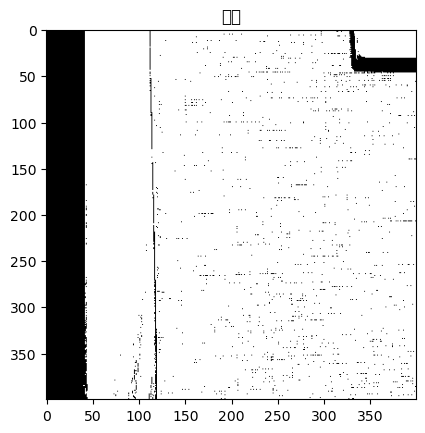

In [7]:
num = 3000
plt.imshow(data[num], cmap='gray')
plt.title(answer[num])

In [ ]:
answer = pd.get_dummies(answer)
answer = answer.values

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(data),answer,test_size=0.2, shuffle=True)

In [9]:
print(xtrain.shape)
print(xtest.shape)

(2765, 400, 400)
(692, 400, 400)


In [10]:
xtrain = xtrain.reshape(2765,400,400,1).astype('float32')/255
xtest = xtest.reshape(692,400,400,1).astype('float32')/255

In [17]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape =(400,400,1), activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='leaky_relu'))
model.add(Flatten())
model.add(Dense(16, activation= 'leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation= 'softmax'))

model.summary()
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 398, 398, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 396, 396, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 198, 198, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 198, 198, 64)      0         
                                                                 
 flatten_4 (Flatten)         (None, 2509056)           0         
                                                                 
 dense_8 (Dense)             (None, 16)                40144912  
                                                      

In [20]:
modelpath="lightcnn_bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(xtrain,ytrain, validation_data=(xtest, ytest), batch_size=50, epochs = 500, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/500
56/56 [==============================] - 90s 2s/step - loss: 9.5471 - accuracy: 0.1689 - val_loss: 2.3241 - val_accuracy: 0.3598
Epoch 2/500
56/56 [==============================] - 100s 2s/step - loss: 2.6449 - accuracy: 0.3074 - val_loss: 2.1182 - val_accuracy: 0.4090
Epoch 3/500
56/56 [==============================] - 99s 2s/step - loss: 2.1159 - accuracy: 0.3758 - val_loss: 2.1424 - val_accuracy: 0.4104
Epoch 4/500
56/56 [==============================] - 88s 2s/step - loss: 1.5625 - accuracy: 0.5291 - val_loss: 1.9418 - val_accuracy: 0.4147
Epoch 5/500
56/56 [==============================] - 88s 2s/step - loss: 1.2380 - accuracy: 0.6438 - val_loss: 2.0386 - val_accuracy: 0.4306
Epoch 6/500
56/56 [==============================] - 86s 2s/step - loss: 0.9708 - accuracy: 0.7280 - val_loss: 1.9248 - val_accuracy: 0.4393
Epoch 7/500
56/56 [==============================] - 95s 2s/step - loss: 0.8023 - accuracy: 0.7750 - val_loss: 2.1794 - val_accuracy: 0.4118
Epoch 8/500


KeyboardInterrupt: 

In [18]:
my_model = load_model('lightcnn_bestmodel.hdf5')

In [19]:
score = my_model.evaluate(xtest, ytest)
print('Test accuracy:', score[1])

22/22 [==============================] - 1s 39ms/step - loss: 2.9381 - accuracy: 0.4104
Test accuracy: 0.41040462255477905
